In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [49]:
data = pd.read_csv("Training.csv").dropna(axis=1)
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [50]:
df.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [51]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


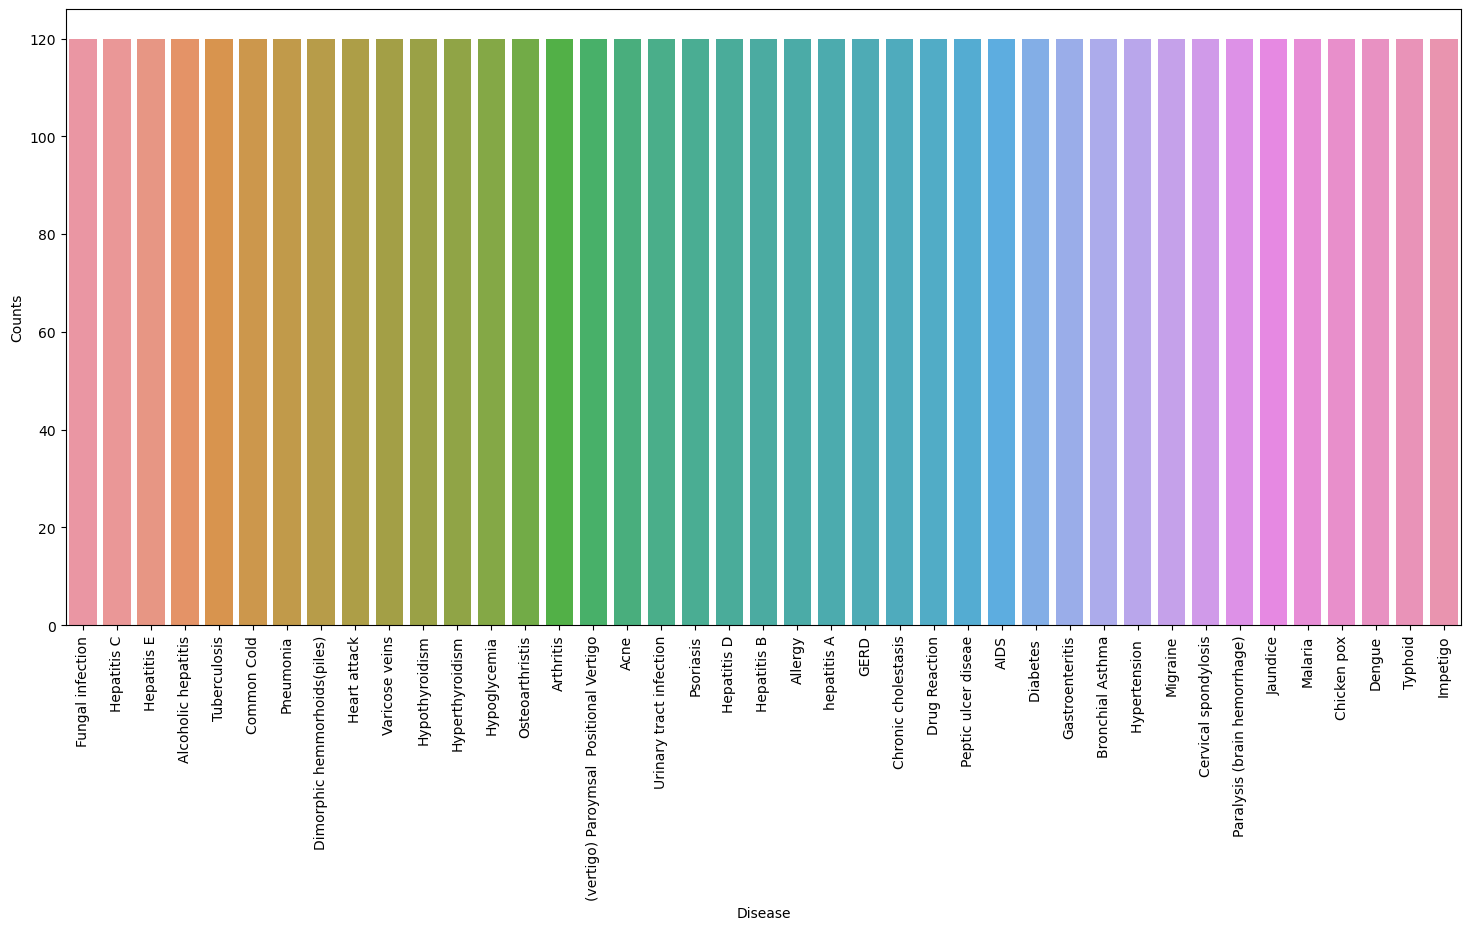

In [52]:
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({"Disease":disease_counts.index, "Counts":disease_counts.values})
plt.figure(figsize=(18,8))
sns.barplot(x= "Disease",y= "Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [53]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])


In [54]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=24)
print(x_train.shape,y_train.shape)
print(x_train.shape, y_test.shape)

(3936, 132) (3936,)
(3936, 132) (984,)


In [37]:
def cv_scoring(estimator,x,y):
    return accuracy_score(y,estimator.predict(x))

models = {
    "SVC":SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model,x,y,cv=5,n_jobs=-1,scoring=cv_scoring)
    
    print("="*30)
    print(model_name)
    print(f"Scores:{scores}")
    print(f"Mean Scores:{np.mean(scores)}")

SVC
Scores:[0.05182927 0.04166667 0.04979675 0.03861789 0.03861789]
Mean Scores:0.04410569105691057
Gaussian NB
Scores:[0.05386179 0.05386179 0.07012195 0.06097561 0.06199187]
Mean Scores:0.06016260162601626
Random Forest
Scores:[0.05589431 0.05182927 0.38821138 0.71138211 0.68394309]
Mean Scores:0.3782520325203252


Accuracy of prediction for Training data is 5.259146341463414
Accuracy of prediction for Testing data is 3.9634146341463414


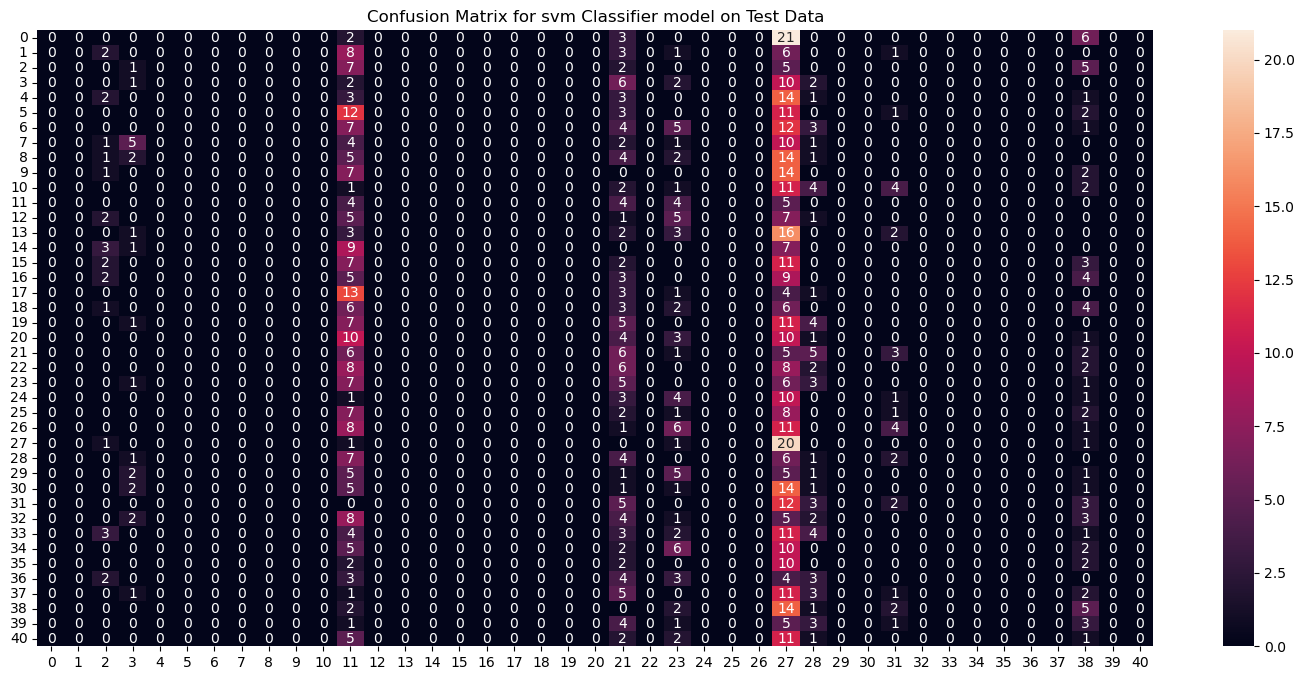

In [38]:
#SVM Classifier
svm_model = SVC()
svm_model.fit(x_train, y_train)
preds = svm_model.predict(x_test)

print(f"Accuracy of prediction for Training data is: {accuracy_score(y_train,svm_model.predict(x_train))*100}")
print(f"Accuracy of prediction for Testing data is: {accuracy_score(y_test,svm_model.predict(x_test))*100}")

cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(18,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for svm Classifier model on Test Data")
plt.show()

Accuracy on Training Data by Naive Bayes Classifier7.03760162601626
Accuracy on Test Data by Naive Bayes Classifier6.605691056910569


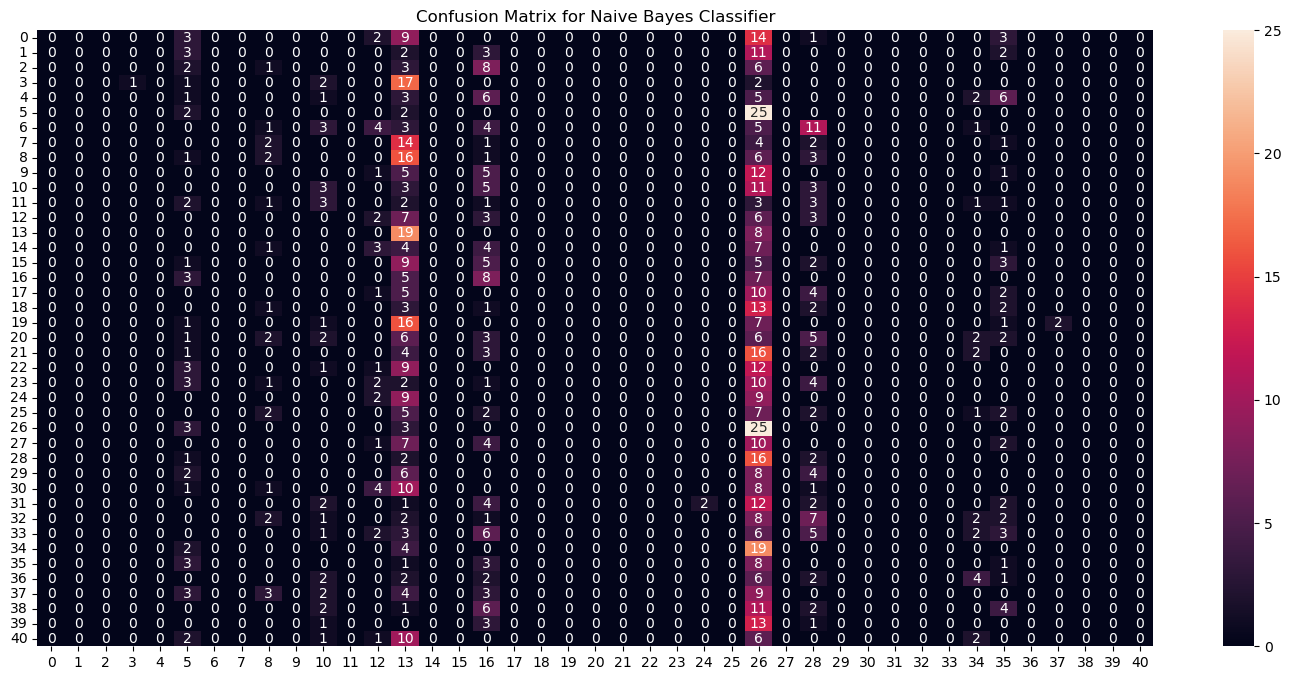

In [42]:
#Naive Bayes classifier Model
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_preds = nb_model.predict(x_test)

print(f"Accuracy on Training Data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(x_train))*100}")
print(f"Accuracy on Test Data by Naive Bayes Classifier: {accuracy_score(y_test, nb_model.predict(x_test))*100}")

cf_matrix = confusion_matrix(y_test,nb_preds)
plt.figure(figsize=(18,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test data")
plt.show()


Accuracy on Training Data by RandomForest Classifier41.41260162601626
Accuracy on Test Data by RandomForest Classifier33.13008130081301


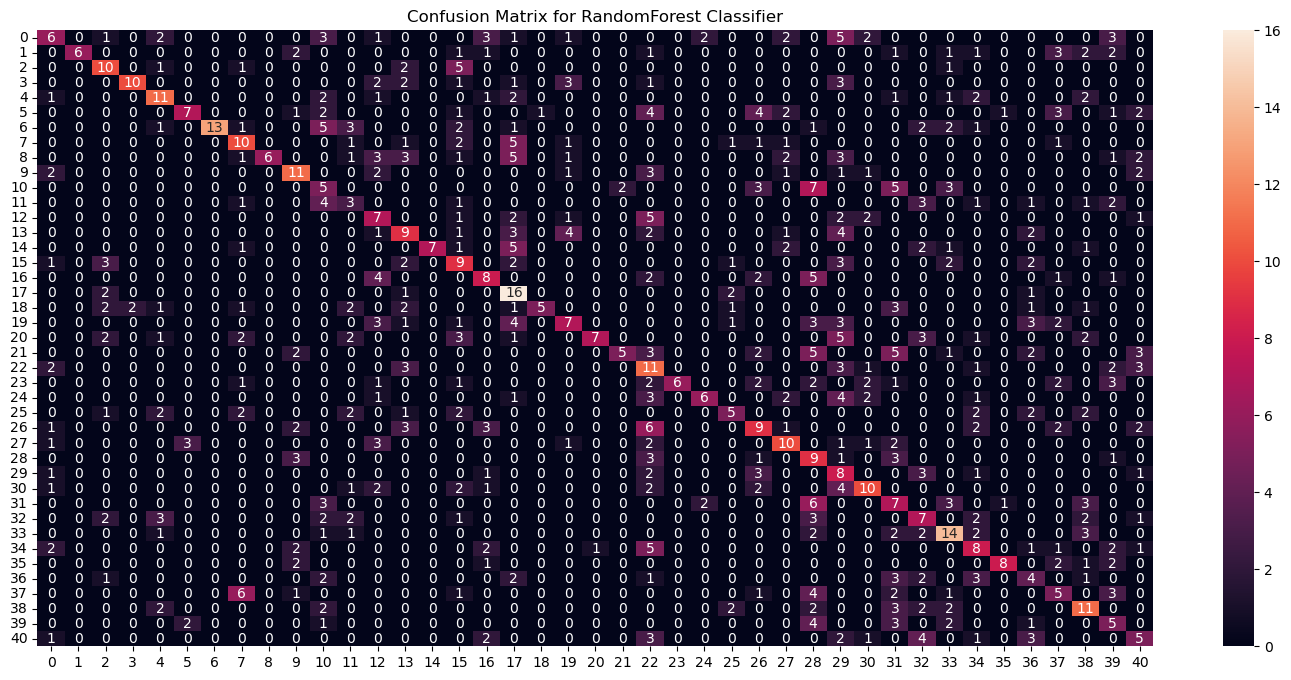

In [43]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(x_train,y_train)
rf_preds = rf_model.predict(x_test)

print(f"Accuracy on Training Data by RandomForest Classifier: {accuracy_score(y_train, rf_model.predict(x_train))*100}")
print(f"Accuracy on Test Data by RandomForest Classifier: {accuracy_score(y_test, rf_model.predict(x_test))*100}")

cf_matrix = confusion_matrix(y_test,rf_preds)
plt.figure(figsize=(18,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for RandomForest Classifier on Test data")
plt.show()

Accuracy on Test dataset by the combined model: 100.0


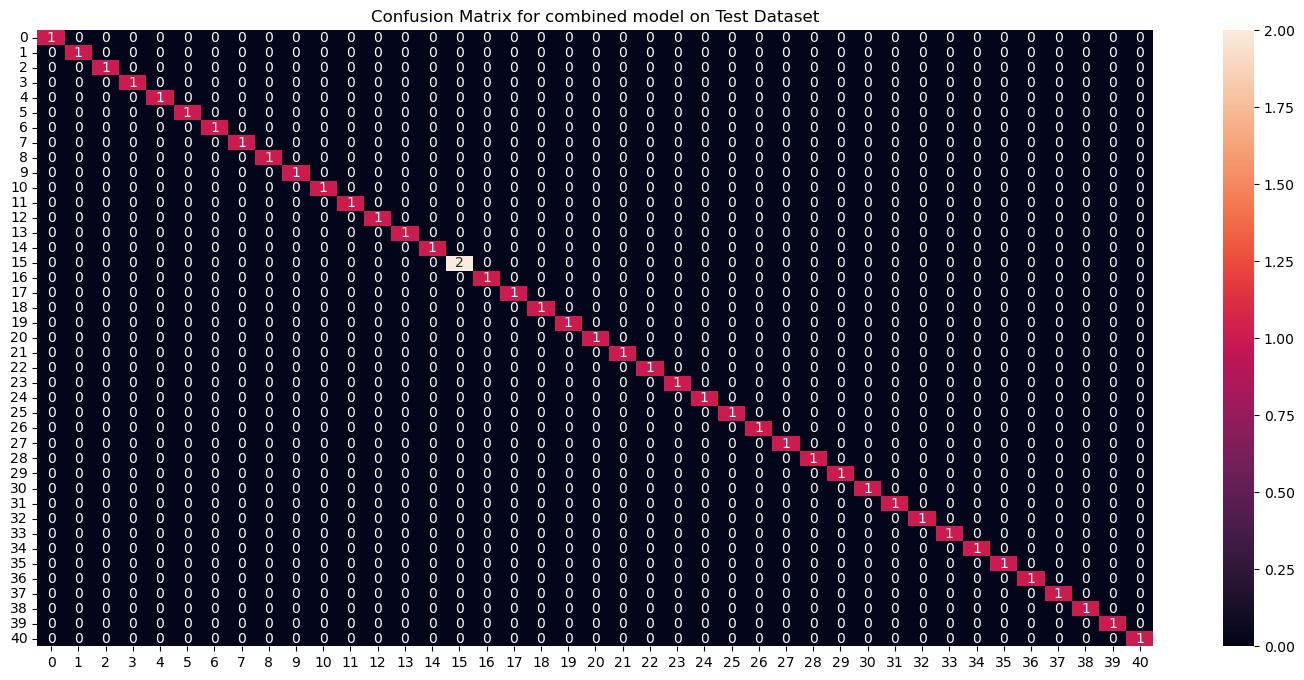

In [57]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(x, y)
final_nb_model.fit(x, y)
final_rf_model.fit(x, y)

test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_x = test_data.iloc[:,:-1]
test_y = encoder.transform(test_data.iloc[:,-1])

svm_preds = final_svm_model.predict(test_x)
nb_preds = final_nb_model.predict(test_x)
rf_preds = final_rf_model.predict(test_x)

final_preds = [mode([i,j,k], keepdims=True)[0][0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_y, final_preds)*100}")

cf_matrix = confusion_matrix(test_y,final_preds)
plt.figure(figsize=(18,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for combined model on Test Dataset")
plt.show()

In [76]:
symptoms = x.columns.values 
  
# Creating a symptom index dictionary to encode the 
# input symptoms into numerical form 
symptom_index = {} 
for index, value in enumerate(symptoms): 
    symptom = " ".join([i.capitalize() for i in value.split("_")]) 
    symptom_index[symptom] = index 
  
data_dict = { 
    "symptom_index":symptom_index, 
    "predictions_classes":encoder.classes_ 
} 
  
# Defining the Function 
# Input: string containing symptoms separated by commas 
# Output: Generated predictions by models 
def predictDisease(symptoms): 
    symptoms = symptoms.split(",") 
      
    # creating input data for the models 
    input_data = [0] * len(data_dict["symptom_index"]) 
    for symptom in symptoms: 
        index = data_dict["symptom_index"][symptom] 
        input_data[index] = 1
          
    # reshaping the input data and converting it 
    # into suitable format for model predictions 
    input_data = np.array(input_data).reshape(1,-1) 
      
    # generating individual outputs 
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]] 
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]] 
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]] 
      
    # making final prediction by taking mode of all predictions 
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0] 
    predictions = { 
        "rf_model_prediction": rf_prediction, 
        "naive_bayes_prediction": nb_prediction, 
        "svm_model_prediction": svm_prediction, 
        "final_prediction":final_prediction 
    } 
    return predictions 
  
# Testing the function 
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_25084\550875383.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this w